### Personal Information
- ID:     20127043
- Name:   Nguyen Thoai Dang Khoa
- Class:  20CLC08

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
WIDTH = 400
HEIGHT = 400

### Create centroids based on type

In [2]:
def centroids_initializing(img_1d, k_clusters, init_centroids):
  centroids = []
  
  if init_centroids == 'random':
    while(len(centroids) != k_clusters):
      random_numbers = []
      for i in range(3):
        random_numbers.append(np.random.randint(0,256))
      if (random_numbers not in centroids):
        centroids.append(random_numbers)
    centroids = np.array(centroids)
    return centroids 

  elif init_centroids == 'in_pixels':
    while(len(centroids) != k_clusters):
      random_index = []
      for i in range(k_clusters):
        index = np.random.randint(img_1d.shape[0])
        if (index in random_index):
          i = i - 1
          continue
        random_index.append(index)
      for i in random_index:
        centroids.append(img_1d[i])
    centroids = np.array(centroids)
    return centroids
      
  else:
    return None

### Get distance between 2 vectors

In [3]:
def get_distance(vector_a, vector_b):
  return np.linalg.norm(vector_a - vector_b)

### Assign label for pixel

In [4]:
def labels_assign(img_1d, centroids):
  labels = []
  temp = []
  for i in range(len(img_1d)):
    for j in range(len(centroids)):
      distance = get_distance(img_1d[i],centroids[j])
      if (distance != 0):
        temp.append(int(distance)) 
    minValue = min(temp)
    minIndex = temp.index(minValue)
    labels.append(int(minIndex))
    temp = []
  labels = np.array(labels) 
  return labels


### Update current centroids

In [5]:
def centroids_updating(img_1d, labels_arr, centroids_shape):
    centroids_updated = np.zeros(centroids_shape) # create matrix zeros
    centroids_row = centroids_shape[0]
    # Loop very centroid
    for i in range(centroids_row):
        # Get Pixels which are correspondent to cluster i
        pixelsInCluster = img_1d[labels_arr == i] 
        # Update centroid using mean on rows with each cluster
        if pixelsInCluster.shape[0]:
            centroids_updated[i] = np.mean(pixelsInCluster, axis=0)
    return centroids_updated

### K-means Clustering Algorithm

In [6]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    
    ### YOUR CODE HERE
    centroids = centroids_initializing(img_1d,k_clusters,init_centroids) #initializing centroids based on init_centroids type
    labels = np.full(img_1d.shape[0], 0) #initalize 0 for all elements in labels array
    while max_iter != 0:
        # Assign label to every pixel
        labels = labels_assign(img_1d, centroids)
        # Update centroid
        centroids = centroids_updating(img_1d, labels, centroids.shape)
        max_iter -= 1
    return centroids, labels



### Open an image and reshape

In [7]:
from PIL import Image

def openAndReshapeImg(inputImg):
  # Open img
  image = Image.open(inputImg)
  #image = image.resize((400, 400))
  # Convert to numpy arrays (3d matrix)
  image = np.array(image)
  #image = np.array(resized_img)
  # Preprocessing - Flat image to a 1D array
  rows = image.shape[0]
  cols = image.shape[1]
  channels = image.shape[2]
  flatImage = image.reshape(rows * cols, channels)
  return flatImage, image


### Reshape to the original image

In [8]:
def reshapeToOriginalImg(centroids, labels, image):
  # Reconstructing the img by replacing every single pixel with its centroid
  outputImg = centroids[labels].astype(np.uint8)
  # Reshape to the original shape
  return outputImg.reshape(image.shape)

### Check the number colors of the processed image
- Using Imaging Library to test the result (return a list of colors)
- Use Image.open(path of file name)
- Use getcolors function to get list of colors
- Use len function to check the number of colors in this image

In [9]:
# pict = Image.open("F:\\Bin\\Desktop\\20127043\\C1_cluster5.png")
# plt.imshow(pict)
# plt.axis('off')
# n_colors = Image.Image.getcolors(pict,maxcolors=2000)
# print(f"Number of colors of this image: {len(n_colors)}")

### Main function


Image was successfully processed. 



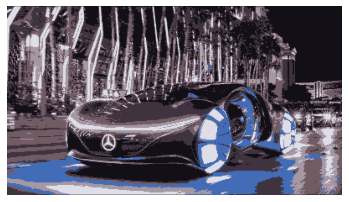

In [10]:
def main():
  # Input name of img
  inputImgName = input('Enter name of an image: ')

  # Input the type of image
  while True:
    inputImgFormat = input('Enter the type of image (jpg / png): ')
    if (inputImgFormat == 'jpg' or inputImgFormat == 'png'): break
  
  # Open and reshape img
  inputImg = inputImgName + '.' + inputImgFormat
  flatImg, image = openAndReshapeImg(inputImg) # processed image (from 3d to 1d)
   
  # Enter the number of clusters
  k_clusters = int(input('Enter the number of clusters (recommend <= 10): ')) 

  # Enter the maximum number of iterations 
  while True:
    max_iter = int(input('Enter the max number of iterations (max 1000) (recommend <= 10): '))
    if (max_iter > 0 or max_iter <= 1000): break

  # Choose type of initial centroids
  while True:
    init_centroids = input('Enter the type of initial centroid (type random or in_pixels): ')
    if (init_centroids == 'random' or init_centroids == 'in_pixels'): break

  
  # Apply K-means clustering algorithm
  centroids, labels = kmeans(flatImg, k_clusters, max_iter, init_centroids)

  # Reshape to the original image
  outputImg = reshapeToOriginalImg(centroids, labels, image)

  # Display output image  
  plt.axis('off') # hide axis
  plt.imshow(outputImg) # display the processed image

  # Save image into specific format
  print("\nImage was successfully processed. \n")
  while True:
    outputImgFormat = input("Enter the type of image for save: (jpg/png/pdf): ")
    if (outputImgFormat == 'jpg' or outputImgFormat == 'png' or outputImgFormat == 'pdf'): break

  # Export image to file
  outputImgName = inputImgName + '_cluster' + str(k_clusters) + '.' + outputImgFormat
  Image.fromarray(outputImg.astype(np.uint8)).save(outputImgName)


# Calling main function
main()